In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [48]:
import math

In [2]:
raw_data = pd.read_csv("train.csv")

In [3]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
raw_data.shape

(1460, 81)

In [5]:
raw_data = raw_data.drop(columns='Id')

In [6]:
raw_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
null_counts = raw_data.isnull().sum()
all_cols = raw_data.columns

In [8]:
for item in range(len(null_counts)):
    print(all_cols[item], ": ", null_counts.iloc[item], "nulls")

MSSubClass :  0 nulls
MSZoning :  0 nulls
LotFrontage :  259 nulls
LotArea :  0 nulls
Street :  0 nulls
Alley :  1369 nulls
LotShape :  0 nulls
LandContour :  0 nulls
Utilities :  0 nulls
LotConfig :  0 nulls
LandSlope :  0 nulls
Neighborhood :  0 nulls
Condition1 :  0 nulls
Condition2 :  0 nulls
BldgType :  0 nulls
HouseStyle :  0 nulls
OverallQual :  0 nulls
OverallCond :  0 nulls
YearBuilt :  0 nulls
YearRemodAdd :  0 nulls
RoofStyle :  0 nulls
RoofMatl :  0 nulls
Exterior1st :  0 nulls
Exterior2nd :  0 nulls
MasVnrType :  872 nulls
MasVnrArea :  8 nulls
ExterQual :  0 nulls
ExterCond :  0 nulls
Foundation :  0 nulls
BsmtQual :  37 nulls
BsmtCond :  37 nulls
BsmtExposure :  38 nulls
BsmtFinType1 :  37 nulls
BsmtFinSF1 :  0 nulls
BsmtFinType2 :  38 nulls
BsmtFinSF2 :  0 nulls
BsmtUnfSF :  0 nulls
TotalBsmtSF :  0 nulls
Heating :  0 nulls
HeatingQC :  0 nulls
CentralAir :  0 nulls
Electrical :  1 nulls
1stFlrSF :  0 nulls
2ndFlrSF :  0 nulls
LowQualFinSF :  0 nulls
GrLivArea :  0 null

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
raw_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
data_no_objects = raw_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood'])

In [12]:
data_no_objects

,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,68.0,11250,Norm,Norm,1Fam,2Story,7,5,2001,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,60.0,9550,Norm,Norm,1Fam,2Story,7,5,1915,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,84.0,14260,Norm,Norm,1Fam,2Story,8,5,2000,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Norm,Norm,1Fam,2Story,6,5,1999,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,85.0,13175,Norm,Norm,1Fam,1Story,6,6,1978,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,66.0,9042,Norm,Norm,1Fam,2Story,7,9,1941,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,68.0,9717,Norm,Norm,1Fam,1Story,5,6,1950,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
data_no_objects = data_no_objects.drop(columns=['Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

In [14]:
data_no_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrType     588 non-null    object 
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  BsmtQual       1423 non-null   object 
 13  BsmtCond       1423 non-null   object 
 14  BsmtExposure   1422 non-null   object 
 15  BsmtFinType1   1423 non-null   object 
 16  BsmtFinSF1     1460 non-null   int64  
 17  BsmtFinType2   1422 non-null   object 
 18  BsmtFinS

In [15]:
data_no_objects = data_no_objects.drop(columns=['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

In [16]:
data_no_objects = data_no_objects.drop(columns=['MasVnrType', 'BsmtExposure'])

In [17]:
data_no_objects.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [18]:
data_no_objects.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
data_no_objects_null_cols_dropped = data_no_objects.drop(columns=['LotFrontage', 'GarageYrBlt'])

In [24]:
data_no_objects_null_rows_dropped = data_no_objects.dropna()

In [25]:
data_no_objects_null_rows_dropped.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


Experiment 1: All numeric values used, nulls dropped

In [31]:
exp_1X = data_no_objects_null_rows_dropped.drop(columns=['SalePrice'])
exp_1y = data_no_objects_null_rows_dropped['SalePrice']

In [32]:
exp_1X.shape, exp_1y.shape

((1121, 36), (1121,))

In [34]:
exp1_X_train, exp1_X_test, exp1_y_train, exp1_y_test = train_test_split(exp_1X, exp_1y, test_size=0.2, random_state=42)

In [35]:
exp1_X_train.shape, exp1_X_test.shape, exp1_y_train.shape, exp1_y_test.shape

((896, 36), (225, 36), (896,), (225,))

In [36]:
linreg_model_1 = linear_model.LinearRegression()
linreg_model_1.fit(exp1_X_train, exp1_y_train)

LinearRegression()

In [37]:
exp1_y_pred = linreg_model_1.predict(exp1_X_test)

In [38]:
exp1_mse = mean_squared_error(exp1_y_test, exp1_y_pred)
exp1_r2 = r2_score(exp1_y_test, exp1_y_pred)

In [44]:
print("Experiment 1 mean squared error: %.2f" % exp1_mse)

Experiment 1 mean squared error: 1588229760.73


In [46]:
print("Experiment 1 coefficient of determination: %.3f" % exp1_r2)

Experiment 1 coefficient of determination: 0.799


In [49]:
print("Experiment 1 root mse: %.2f" % math.sqrt(exp1_mse))

Experiment 1 root mse: 39852.60


Experiment 2: Columns with nulls dropped, all rows used

In [72]:
data_no_objects_null_cols_dropped = data_no_objects_null_cols_dropped.dropna(subset=['MasVnrArea'])

In [73]:
exp2_X = data_no_objects_null_cols_dropped.drop(columns=['SalePrice'])
exp2_y = data_no_objects_null_cols_dropped['SalePrice']

In [74]:
exp2_X.shape, exp2_y.shape

((1452, 34), (1452,))

In [75]:
exp2_X_train, exp2_X_test, exp2_y_train, exp2_y_test = train_test_split(exp2_X, exp2_y, test_size=0.2, random_state=42)

In [76]:
exp2_X_train.shape, exp2_X_test.shape, exp2_y_train.shape, exp2_y_test.shape

((1161, 34), (291, 34), (1161,), (291,))

In [77]:
linreg_model_2 = linear_model.LinearRegression()
linreg_model_2.fit(exp2_X_train, exp2_y_train)

LinearRegression()

In [78]:
exp2_y_pred = linreg_model_2.predict(exp2_X_test)

In [79]:
exp2_mse = mean_squared_error(exp2_y_test, exp2_y_pred)
exp2_root_mse = math.sqrt(exp2_mse)
exp2_r2 = r2_score(exp2_y_test, exp2_y_pred)

In [80]:
print("Experiment 2 mean squared error: %.2f" % exp2_mse)

Experiment 2 mean squared error: 930983000.66


In [82]:
print("Experiment 2 coefficient of determination: %.3f" % exp2_r2)

Experiment 2 coefficient of determination: 0.848


In [81]:
print("Experiment 2 root mse: %.2f" % exp2_root_mse)

Experiment 2 root mse: 30512.01


Current analysis: having more data is more important than having more variables.

<Axes: >

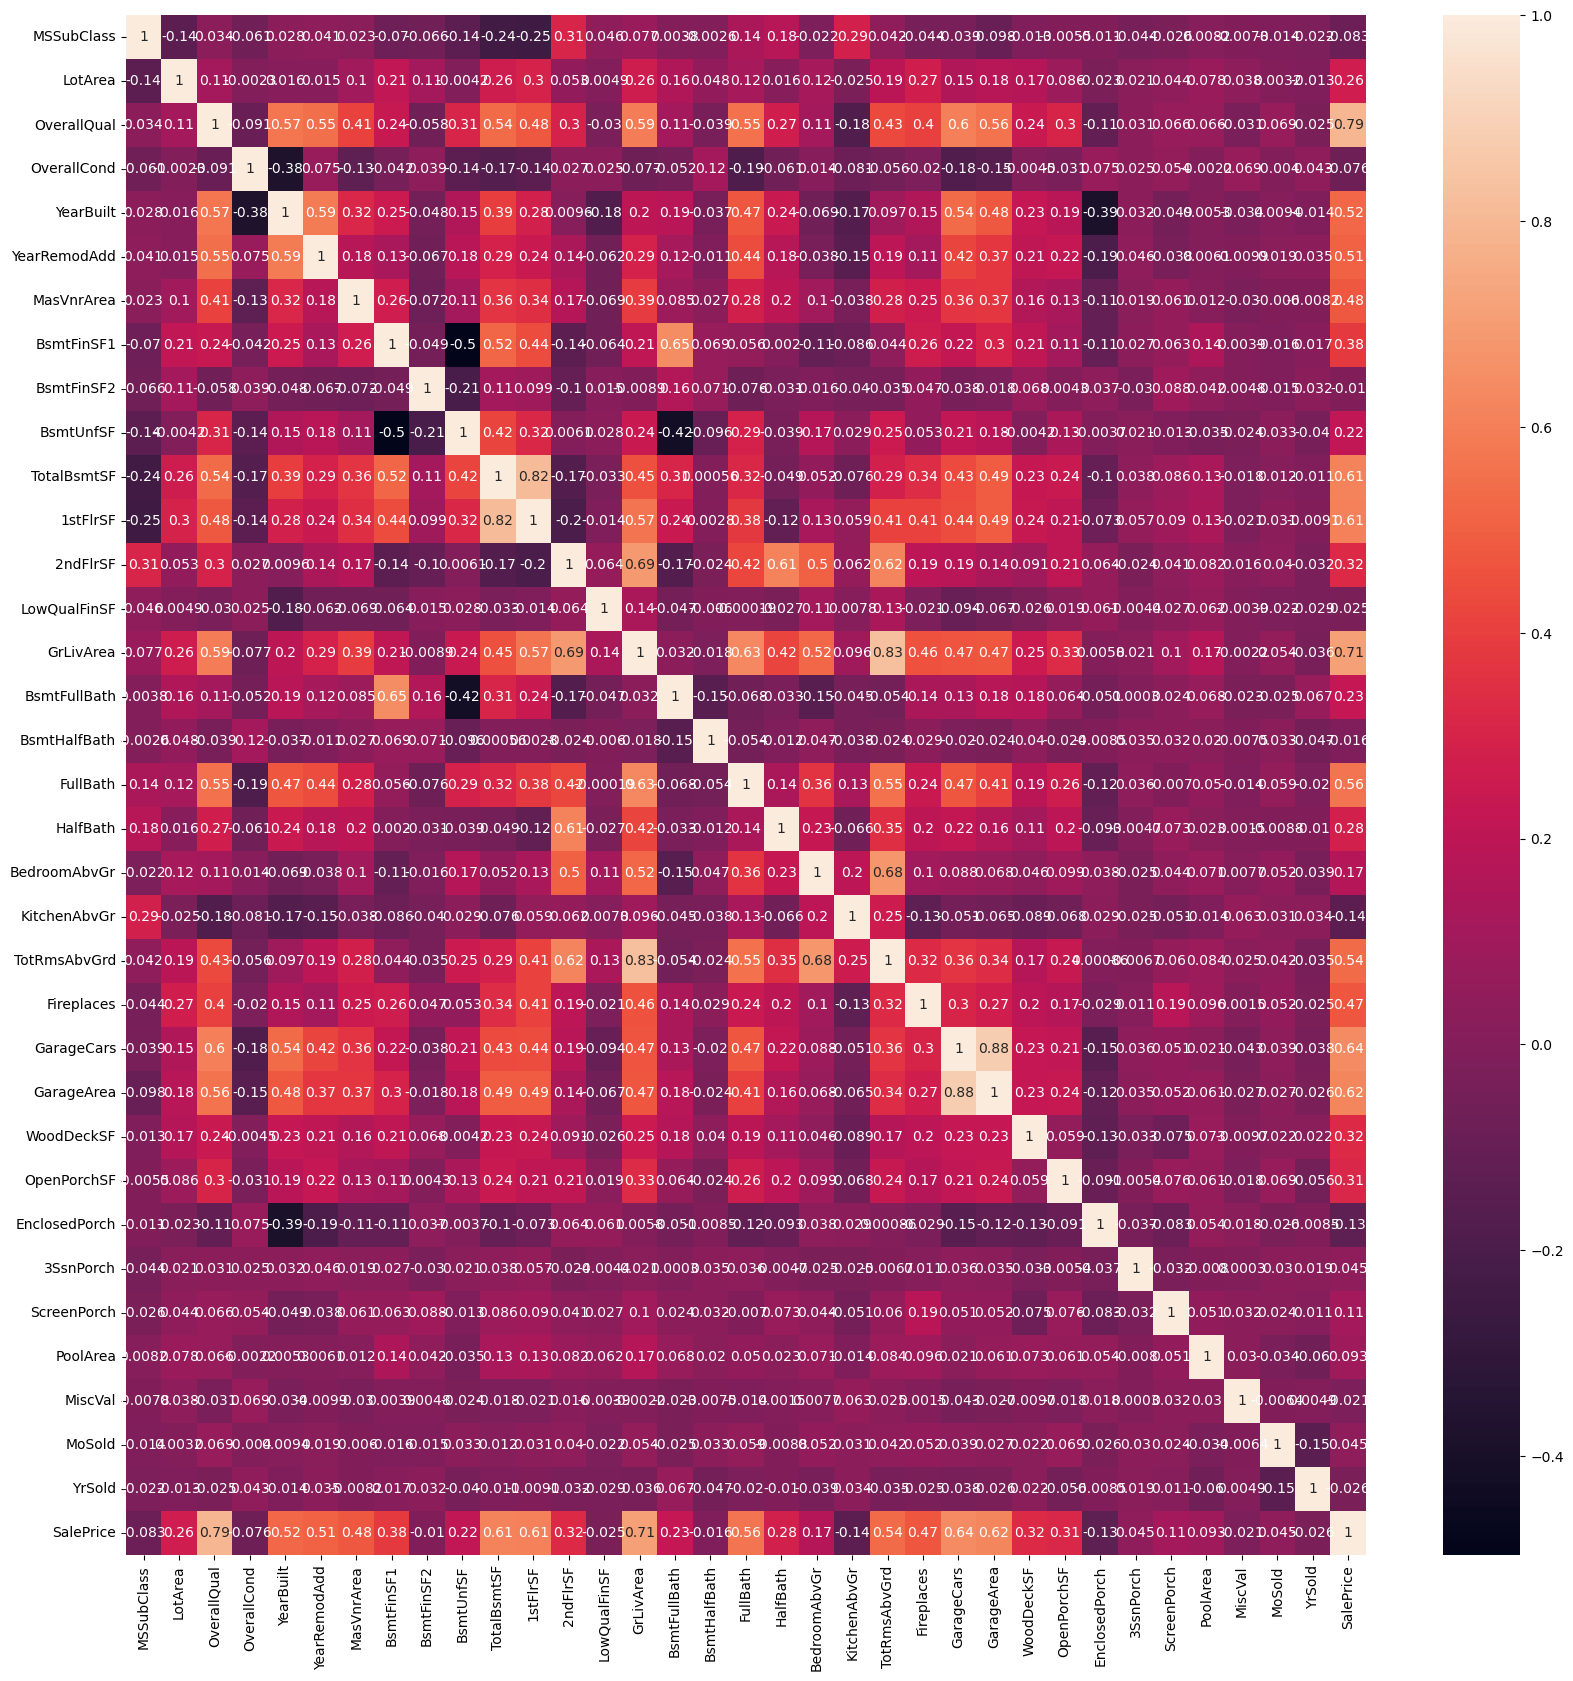

In [87]:
cleaned_v1_corr = data_no_objects_null_cols_dropped.corr()
fig1, ax1 = plt.subplots(figsize=(20,20))
sns.heatmap(cleaned_v1_corr, annot=True, ax=ax1)

Experiment 3: Dropping columns with a correlation to sale price between -0.1 and 0.1

In [88]:
cleaned_exp3_data = data_no_objects_null_cols_dropped.drop(columns=['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

<Axes: >

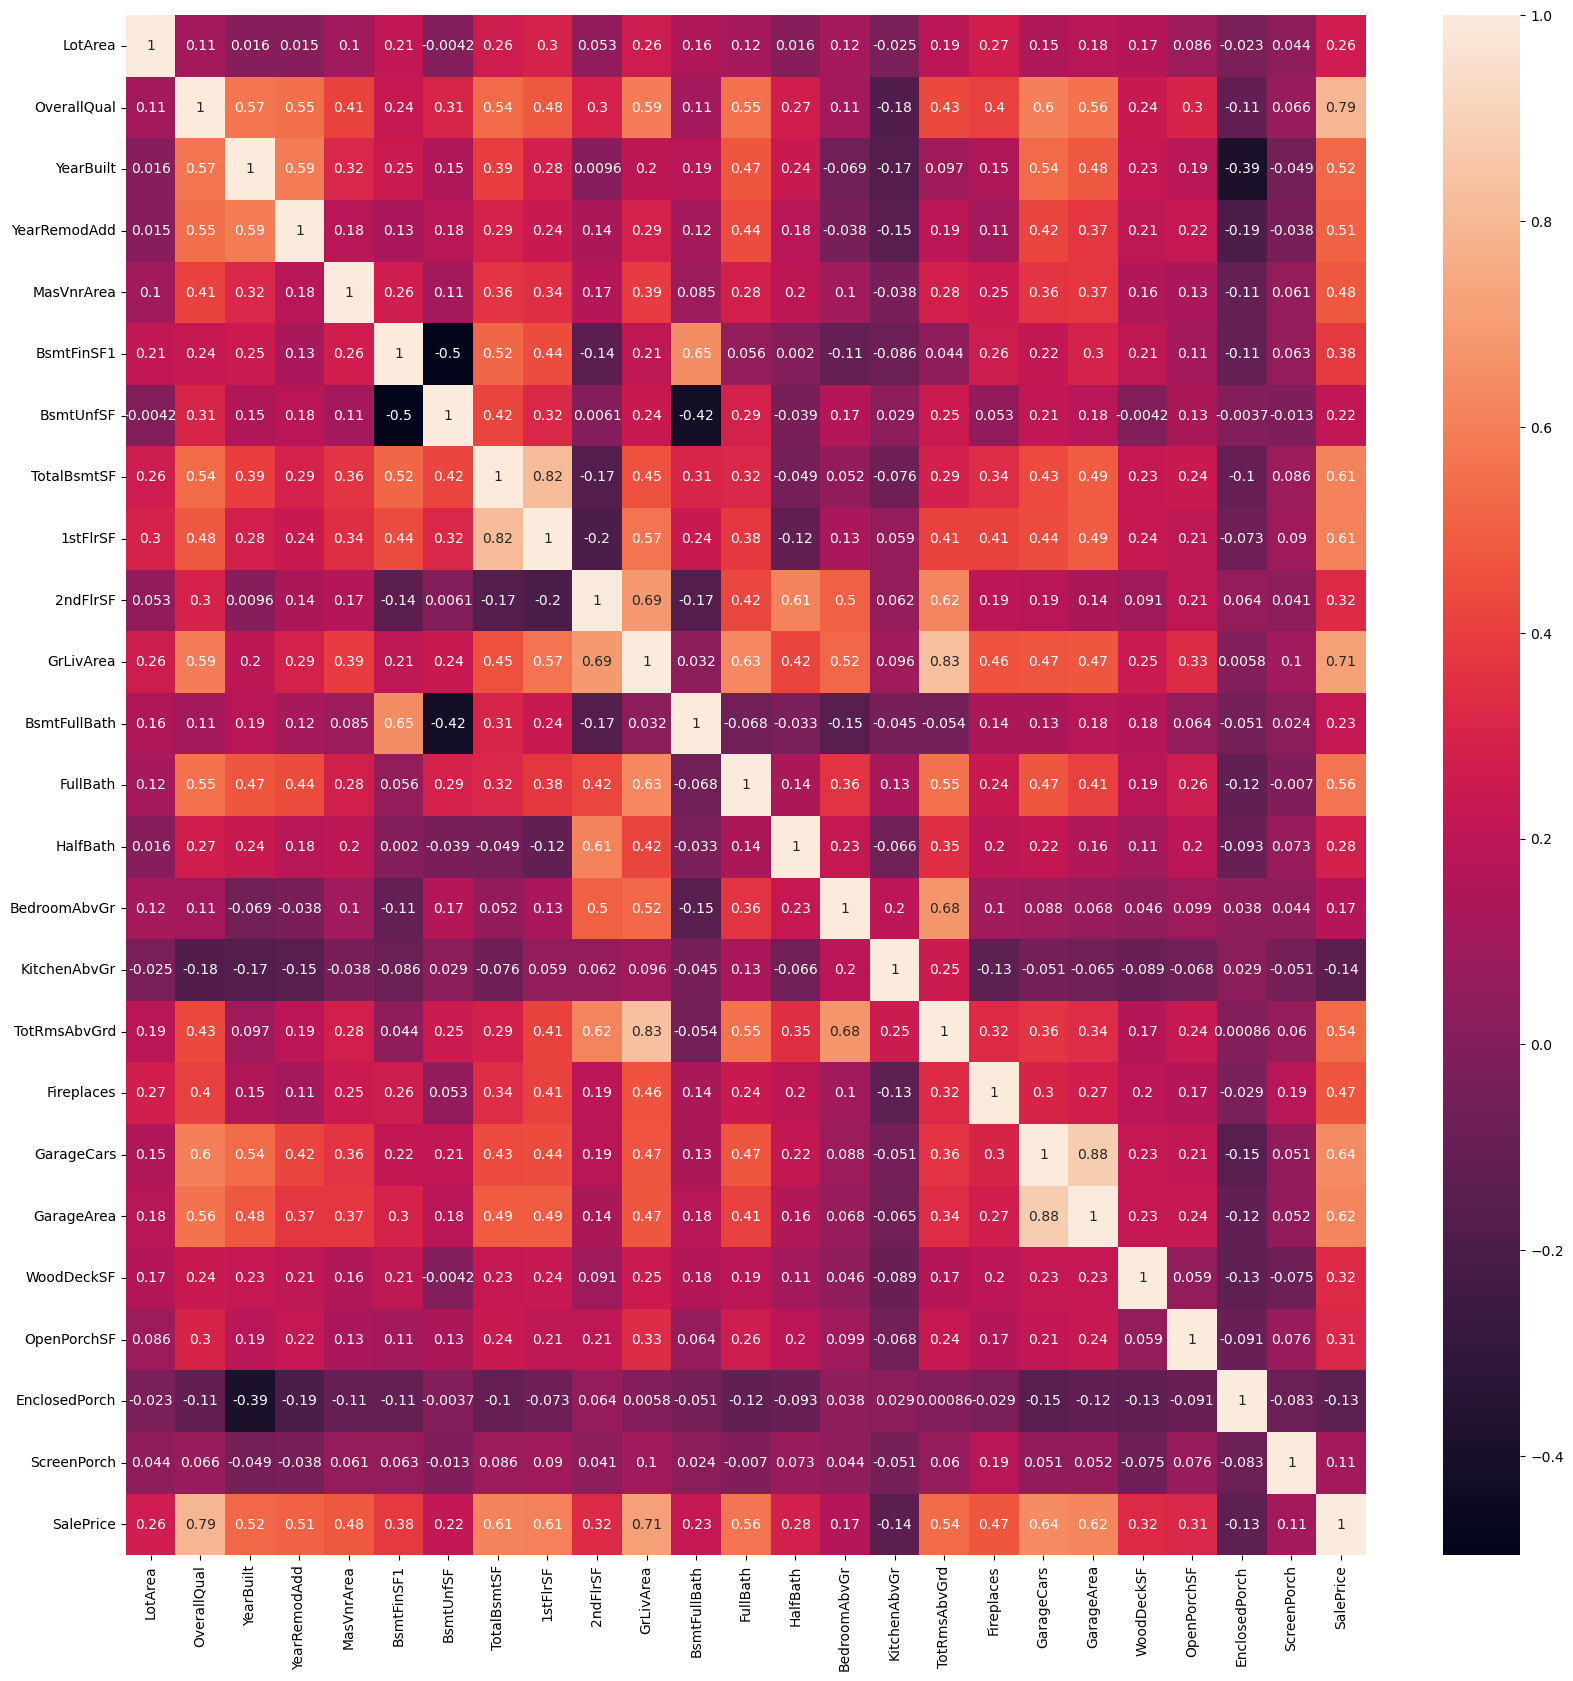

In [92]:
fig2, ax2 = plt.subplots(figsize=(20, 20))
sns.heatmap(cleaned_exp3_data.corr(), annot=True, ax=ax2)

In [93]:
exp3_X = cleaned_exp3_data.drop(columns=['SalePrice'])
exp3_y = cleaned_exp3_data['SalePrice']

In [94]:
exp3_X.shape, exp3_y.shape

((1452, 24), (1452,))

In [95]:
exp3_X_train, exp3_X_test, exp3_y_train, exp3_y_test = train_test_split(exp3_X, exp3_y, test_size=0.2, random_state=42)

In [96]:
exp3_X_train.shape, exp3_X_test.shape, exp3_y_train.shape, exp3_y_test.shape

((1161, 24), (291, 24), (1161,), (291,))

In [97]:
linreg_model_3 = linear_model.LinearRegression()
linreg_model_3.fit(exp3_X_train, exp3_y_train)

LinearRegression()

In [98]:
exp3_y_pred = linreg_model_3.predict(exp3_X_test)

In [99]:
exp3_mse = mean_squared_error(exp3_y_test, exp3_y_pred)
exp3_root_mse = math.sqrt(exp3_mse)
exp3_r2 = r2_score(exp3_y_test, exp3_y_pred)

In [101]:
print("Experiment 3 mean squared error: %.2f" % exp3_mse)

Experiment 3 mean squared error: 991848851.40


In [102]:
print("Experiment 3 coefficient of determination: %.3f" % exp3_r2)

Experiment 3 coefficient of determination: 0.838


In [104]:
print("Experiment 3 root mse: %.2f" % exp3_root_mse)

Experiment 3 root mse: 31493.63


Ok so that was worse. Cool. This is fine.